In [52]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # makes the notebook fill the whole window

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from squeemtools.math import FCM
from matplotlib.pyplot import figure
import datetime

# from bokeh.io import output_file, show
# from bokeh.models import ColumnDataSource, GMapOptions
# from bokeh.plotting import gmap

from PIL import Image, ImageDraw
import os
import shutil
import glob

from mpl_toolkits.basemap import Basemap
from squeemtools.graphing import BetterMap

%matplotlib inline

#Turn off interactive plotting for pyplot
plt.ioff()

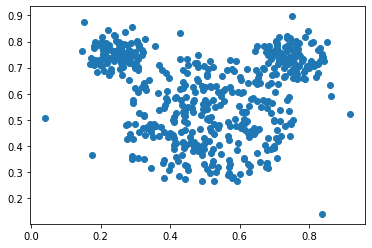

,X,Y,Loc
0,0.456601,0.432806,Head
1,0.611378,0.528625,Head
2,0.450299,0.711606,Head
3,0.639015,0.460744,Head
4,0.628957,0.323470,Head
...,...,...,...
495,0.151506,0.876586,Noise
496,0.860308,0.633833,Noise
497,0.862083,0.591805,Noise
498,0.916030,0.523391,Noise


In [53]:
mouse = pd.read_csv('./sample02.csv',sep=' ',names=['X','Y','Loc'])
plt.scatter(mouse['X'],mouse['Y'])
plt.show()
mouse

In [12]:
fcm = FCM.FCM(mouse[['X','Y']],c=3)

In [13]:
centroids = fcm.fit()

In [14]:
fcm.calculate_entropy() # We look for entropy less than 1 ideally

(0.7260188481980511, {'<.5': 203, '<1': 131, '>1': 146, '>1.5': 20})

In [17]:
mouse['FCM'] = fcm.classify()

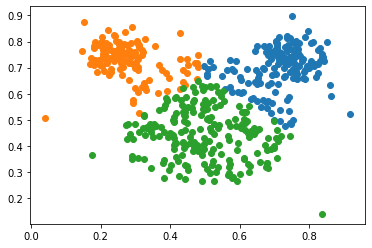

In [19]:
for x in range(3):
    plt.scatter(mouse[mouse['FCM'] == x]['X'],mouse[mouse['FCM'] == x]['Y'])
plt.show()

In [20]:
KM = KMeans(3,max_iter=1000,tol=10e-7)
KM.fit(mouse[['X','Y']])
mouse['KMEANS'] = KM.predict(mouse[['X','Y']])

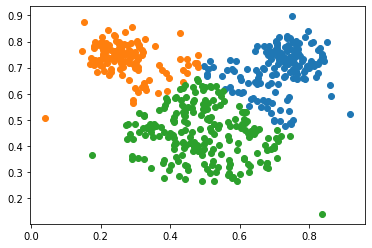

In [21]:
for x in range(3):
    plt.scatter(mouse[mouse['KMEANS'] == x]['X'],mouse[mouse['KMEANS'] == x]['Y'])
plt.show()

# These look very much the same

## Time to move on to the blobs data set

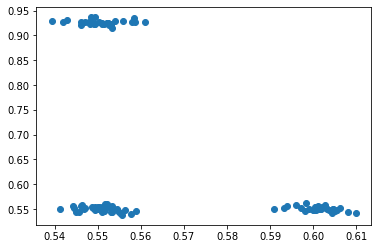

,X,Y
0,0.605470,0.547282
1,0.590862,0.549582
2,0.548940,0.551625
3,0.603320,0.550609
4,0.601743,0.550374
...,...,...
95,0.598390,0.562372
96,0.554804,0.545750
97,0.593299,0.552969
98,0.544953,0.544810


In [22]:
blobs = pd.read_csv('./sample01.csv',usecols=[1,2])
blobs.columns = ['X','Y']
plt.scatter(blobs['X'],blobs['Y'])
plt.show()
blobs

In [24]:
fcm_2 = FCM.FCM(blobs,c=3)
centroids_2 = fcm_2.fit()
blobs['FCM'] = fcm_2.classify()
fcm_2.calculate_entropy()

(0.07586291439168705, {'<.5': 100, '<1': 0, '>1': 0, '>1.5': 0})

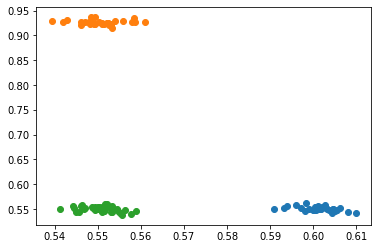

In [26]:
for x in range(3):
    plt.scatter(blobs[blobs['FCM'] == x]['X'],blobs[blobs['FCM'] == x]['Y'])
plt.show()

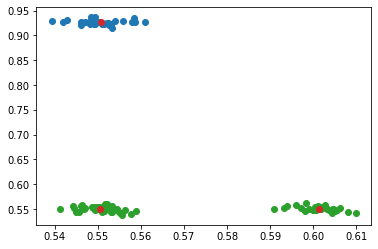

In [42]:
blobs = pd.read_csv('./sample01.csv',usecols=[1,2])
blobs.columns = ['X','Y']
KM_2 = KMeans(3,max_iter=1000,tol=10e-7)
KM_2.fit(blobs)
blobs['KMEANS'] = KM.predict(blobs)

for x in range(3):
    plt.scatter(blobs[blobs['KMEANS'] == x]['X'],blobs[blobs['KMEANS'] == x]['Y'])
plt.scatter(KM_2.cluster_centers_[:,0],KM_2.cluster_centers_[:,1],zorder=2)
plt.show()
# Something is wrong when it comes to the plotting but we can see the centroids are right

In [44]:
blobs = pd.read_csv('./sample01.csv',usecols=[1,2])
blobs.columns = ['X','Y']

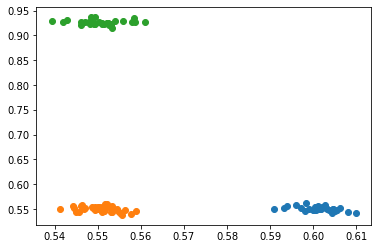

In [51]:
db = DBSCAN(eps=.01) # Use all defaults other than eps (normalized data so small eps)
blobs['DBSCAN'] = db.fit_predict(blobs)
for x in range(len(blobs['DBSCAN'].unique())):
    plt.scatter(blobs[blobs['DBSCAN'] == x]['X'],blobs[blobs['DBSCAN'] == x]['Y'])
plt.show()

In [56]:
#Read in the data from the lightning file and the storm centered
ln = pd.read_csv('./ATL_17_11_Irma_WWLLN_Locations.txt',header=None,names=["Year","Month","Day","Hour","Min","Sec","Lat","Long","Dist_East_West","Dist_North_South"],low_memory=False,sep=' ')
ln['Distance'] = np.sqrt(ln['Dist_East_West'] ** 2 + ln['Dist_North_South'] ** 2)

# Map boundaries
minLong_, minLat_, maxLong_, maxLat_ = ln['Long'].min(), ln['Lat'].min(), ln['Long'].max(), ln['Lat'].max()
buffer = 10
mi = 30

In [59]:
year, month, day, hour, minute = 2017,9,8,20,30

In [60]:
current_ln = ln[(ln['Month'] == month) & (ln['Day'] == day) & (ln['Hour'] == hour) & (ln['Min'] >= minute) & (ln['Min'] < minute + mi)].copy()

In [61]:
current_ln

,Year,Month,Day,Hour,Min,Sec,Lat,Long,Dist_East_West,Dist_North_South,Distance
122796,2017,9,8,20,30,0.1497,29.5326,-79.5609,-295.2800,832.5560,883.368423
122797,2017,9,8,20,30,0.6956,18.1271,-71.0343,578.4980,-435.6780,724.206639
122798,2017,9,8,20,30,3.2749,27.5546,-85.4239,-878.6840,612.6120,1071.157801
122799,2017,9,8,20,30,3.4226,27.5989,-85.3559,-871.6320,617.5380,1068.220729
122800,2017,9,8,20,30,3.9832,19.6181,-76.2114,31.1452,-269.8860,271.677155
...,...,...,...,...,...,...,...,...,...,...,...
123482,2017,9,8,20,59,48.9250,20.5861,-78.1610,-161.5230,-163.0780,229.530202
123483,2017,9,8,20,59,49.3749,21.7879,-84.5211,-816.8170,-29.4439,817.347512
123484,2017,9,8,20,59,49.3749,21.7220,-84.3567,-800.2150,-36.7716,801.059422
123485,2017,9,8,20,59,50.6155,30.6004,-79.8456,-309.7350,950.4610,999.655882


In [63]:
ln_fcm = FCM.FCM(current_ln[['Lat','Long']],c=12,maxiter=100)
ln_centroids = ln_fcm.fit()

In [70]:
current_ln['FCM'] = ln_fcm.classify()

In [64]:
ln_fcm.calculate_entropy()

(0.7342061347597596, {'<.5': 362, '<1': 133, '>1': 68, '>1.5': 128})

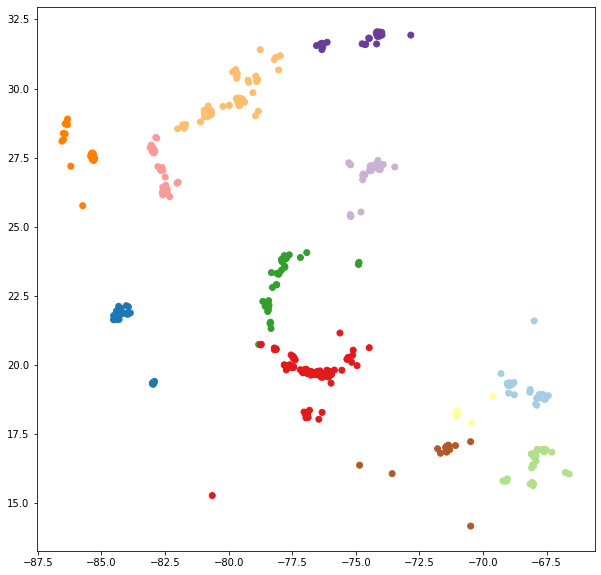

In [76]:
plt.figure(figsize=(10,10))
plt.scatter(current_ln['Long'],current_ln['Lat'],c=current_ln['FCM'],cmap='Paired')
plt.show()

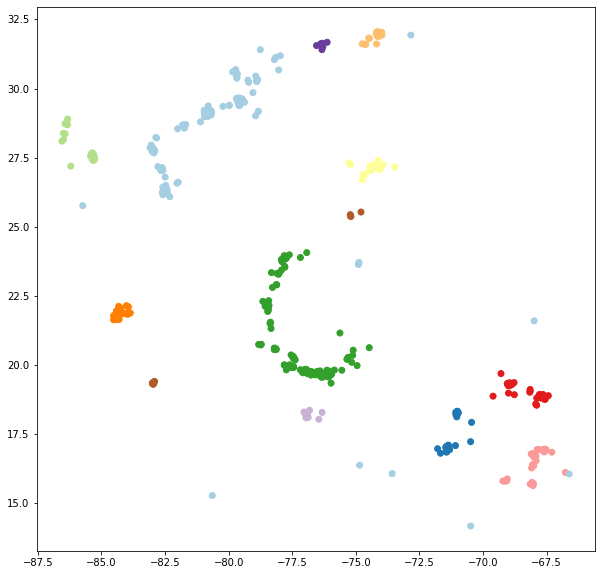

In [82]:
plt.figure(figsize=(10,10))
db = DBSCAN(eps=1)
centers = db.fit_predict(current_ln[['Lat','Long']])
current_ln['DBSCAN'] = centers
plt.scatter(current_ln['Long'],current_ln['Lat'],c=current_ln['DBSCAN'],cmap='Paired')
plt.show()

In [84]:
len(set(centers)) # number of centroids

14